In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import re
import seaborn as sns

%matplotlib inline

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [33]:
plt.style.use('Solarize_Light2')

In [2]:
data_root_path = os.path.join('artifacts', 'data')
files = os.listdir(data_root_path)
print(files)

['adult.data', 'adult.names', 'adult.test', 'Index', 'old.adult.names']


In [3]:
train_data_path = os.path.join(data_root_path, 'adult.data')
test_data_path =  os.path.join(data_root_path, 'adult.test')
text_file_path =  os.path.join(data_root_path, 'adult.names')

### Checking the file content to get information on the data

In [4]:
with open(text_file_path) as fp:
    cols = []
    for line in fp:
        #print(line)
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('label')

In [ ]:
'''from pprint import pprint
file = os.path.join(data_root_path, 'old.adult.names')
with open(file) as fp:
    for line in fp:
        pprint(line)'''

In [5]:
print(cols)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']


In [6]:
options = {'header': None, 'names': cols, 'skipinitialspace': True}
income_df = pd.read_csv(train_data_path, **options)
income_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_income_df = pd.read_csv(test_data_path, skiprows=1, **options)
test_income_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
# Sanity to check to make sure the total length corresponds \
# to the description of the data.
print(len(income_df))
print(len(test_income_df)) 
print(len(income_df) + len(test_income_df)) 

32561
16281
48842


In [9]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
test_income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [12]:
test_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  label           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [13]:
TRAIN_LABEL_COUNTS = income_df.label.value_counts()

TRAIN_LABEL_COUNTS

label
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [14]:
TRAIN_LABEL_COUNTS = income_df.label.value_counts(normalize = True)
TRAIN_LABEL_COUNTS

label
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

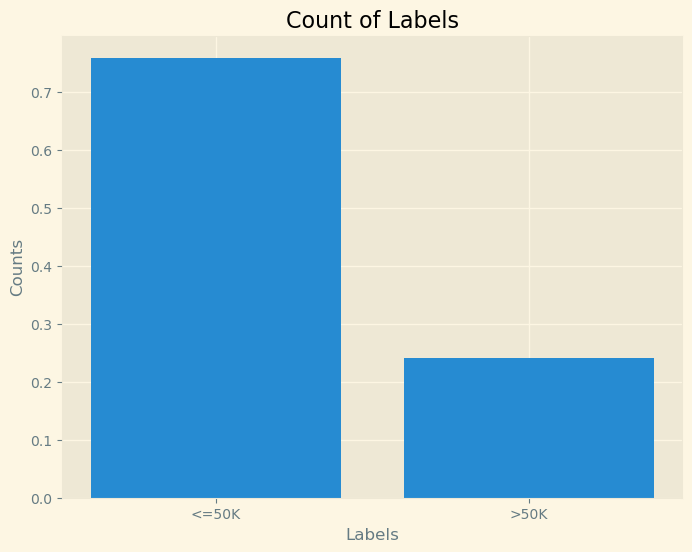

In [34]:
plt.figure(figsize = (8,6))
plt.bar(TRAIN_LABEL_COUNTS.index, TRAIN_LABEL_COUNTS.values)
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Count of Labels")
plt.show()

In [16]:
TEST_LABEL_COUNTS = test_income_df.label.value_counts()
TEST_LABEL_COUNTS

label
<=50K.    12435
>50K.      3846
Name: count, dtype: int64

In [17]:
TEST_LABEL_COUNTS = test_income_df.label.value_counts(normalize = True)
TEST_LABEL_COUNTS

label
<=50K.    0.763774
>50K.     0.236226
Name: proportion, dtype: float64

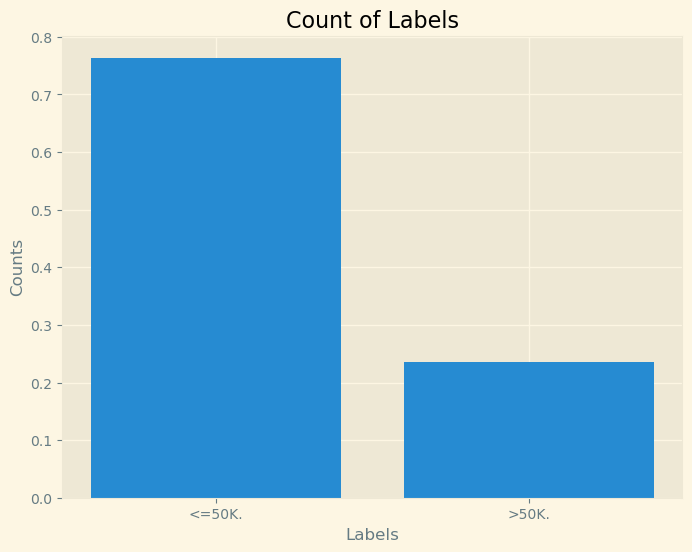

In [35]:
plt.figure(figsize = (8,6))
plt.bar(TEST_LABEL_COUNTS.index, TEST_LABEL_COUNTS.values)
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Count of Labels")
plt.show()

In [19]:
#categorical_features = []
features = income_df.columns

In [20]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [21]:
for feature in categorical_features:
    print(f"==========================={feature}===========================")
    print(income_df[feature].unique())
    print(f"There are {income_df[feature].nunique()} unique values of this feature")
    

===========================workclass===========================
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
There are 9 unique values of this feature
===========================education===========================
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
There are 16 unique values of this feature
===========================marital-status===========================
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
There are 7 unique values of this feature
===========================occupation===========================
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv

In [22]:
for feature in categorical_features:
    print(f"======{feature}======")
    print(test_income_df[feature].unique())
    print(f"There are {test_income_df[feature].nunique()} unique values of this feature")
    

======workclass======
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
There are 9 unique values of this feature
======education======
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
There are 16 unique values of this feature
======marital-status======
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
There are 7 unique values of this feature
======occupation======
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
There are 15 unique values of this feature
======relationship======
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other

In [36]:
def plot(df, column_name):
    """
    Plots a bar chart for a categorical column.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        column_name (str): Name of the categorical column.

    Returns:
        None (Displays the plot)
    """
    # plot bar chart
    plt.figure(figsize=(10,5))
    sns.countplot(x=column_name, hue='label', data= df)
    plt.xticks(rotation=90)
    plt.suptitle(f'{column_name.upper()} DISTRIBUTION EARNING BELOW OR ABOVE 50K')
    plt.show()

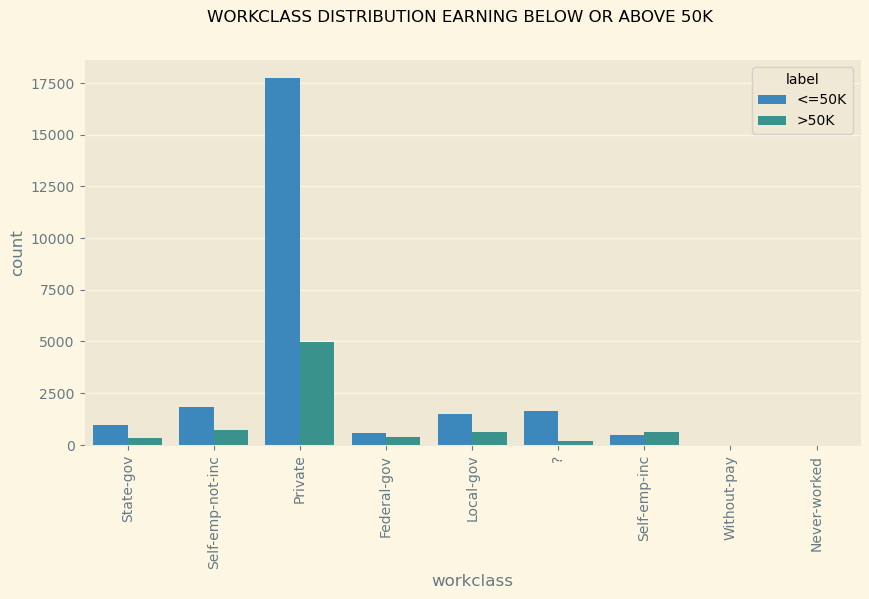

In [37]:

plot(income_df, 'workclass')

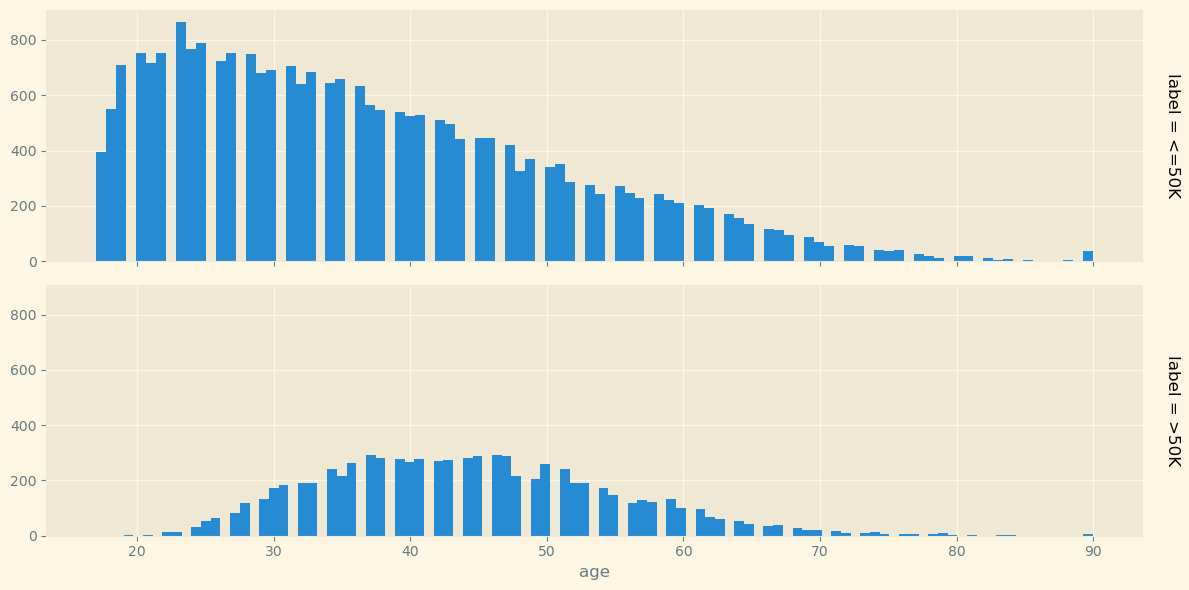

In [38]:
g = sns.FacetGrid(income_df, row="label", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'age',bins=100)
plt.show()

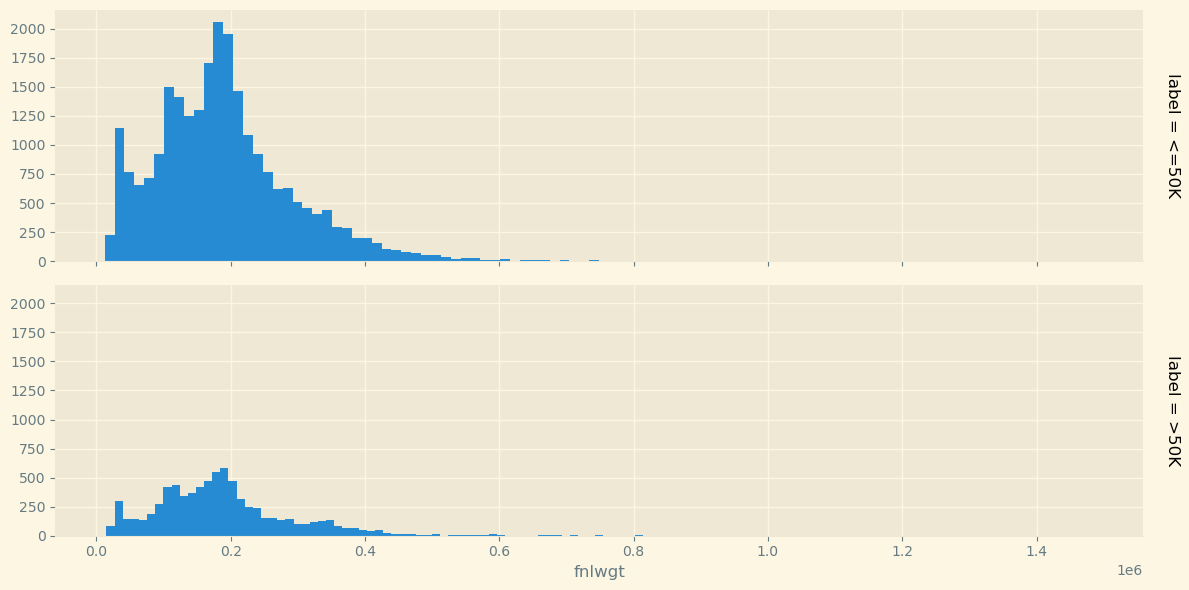

In [39]:
g = sns.FacetGrid(income_df, row="label", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'fnlwgt',bins=100)
plt.show()

#### From inspection the  test data is missing (Holand-netherlands) in the native-country feature. 